In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

from PIL import Image

In [2]:
df = pd.read_csv('./data/stacked_bar_data.csv')

df.set_index('Region', inplace=True)

In [3]:
df_t = df.transpose()
df_t.index = df_t.index.set_names(['Categories'])

In [4]:
# Get dataframes in proper format
grams = ['mahangu_grams', 'maize_grams', 'bread_grams']
kcals = ['mahangu_kcal', 'maize_kcal', 'bread_kcal']

# Get rows with grams
df_t_grams = df_t[df_t.index.isin(grams)]
df_t_kcals = df_t[df_t.index.isin(kcals)]

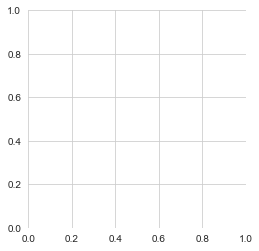

In [5]:
# Function to create charts

tw = {'fontname': 'Tw Cen MT'}
cl = {'fontname': 'Calibri Light'}

# Generate plot
ax = plt.gca()

df_t_grams['Kavango West'].plot(kind='pie', labels=['Mahangu', 'Maize', 'Bread'], autopct='%1.1f%%', ax=ax)


plt.title('Kavango West: Average edible quantitiy (g/capita/day)', loc='center', fontsize=13, **tw)
plt.xlabel("", fontsize=8, **cl)
plt.ylabel("", fontsize=8, **cl)
# plt.xticks(fontsize=8), plt.yticks(fontsize=9)
# ax.set_ylim([0,60])
fig = ax.get_figure()

# Create filename
location = 'output\\02_region\\charts\\DRB\\'
f_ext = '.png'
chart_fn = 'Kavango West' + '_' + 'avg_edible_quant' + f_ext
chart_path = os.path.join(os.getcwd(), location, chart_fn)
# Save file
fig.savefig(chart_path)
plt.cla()

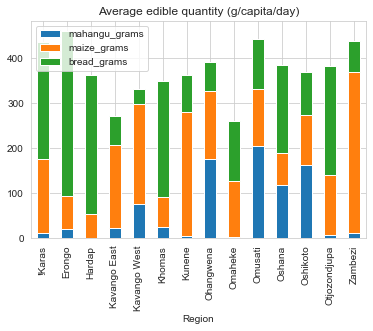

In [6]:
grams_fig = df[grams].plot.bar(stacked=True, title='Average edible quantity (g/capita/day)').get_figure()
grams_fig.savefig('./output/02_region/charts/DRB/region_edible_quantity.svg')

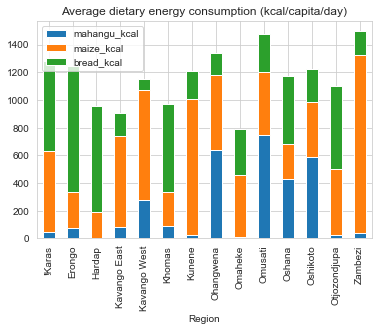

In [7]:
kcals_fig = df[kcals].plot.bar(stacked=True, title='Average dietary energy consumption (kcal/capita/day)').get_figure()
kcals_fig.savefig('./output/02_region/charts/DRB/region_dietary_evergy.svg')

In [8]:
imbg = Image.open('./output/02_region/charts/DRB/Kavango West_Kavango West.png').convert('RGB')
imfg = Image.open('./output/02_region/charts/DRB/Kavango West_avg_edible_quant.png').convert('RGB')

back_im = imbg.copy()
fore_im = imfg.copy()

size = (75, 75)
box = (50, 0, 400, 250)
fore_im = fore_im.resize(size, box=box)

back_im.paste(fore_im, (260,40))
back_im.save("./output/02_region/charts/DRB/Kavango West_overlay.jpg")

FileNotFoundError: [Errno 2] No such file or directory: './output/02_region/charts/DRB/Kavango West_Kavango West.png'